In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Practice Projects\\abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## EDA

In [3]:
df.shape

(4177, 9)

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:xlabel='Length', ylabel='Density'>

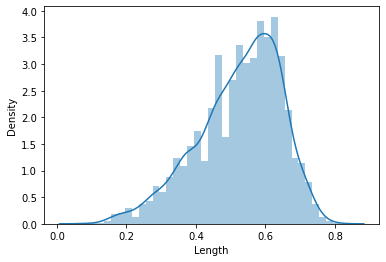

In [6]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

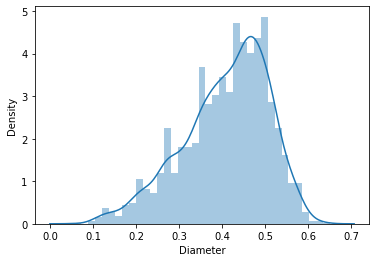

In [7]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

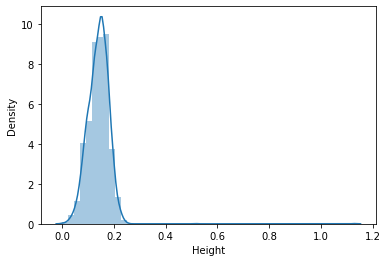

In [8]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

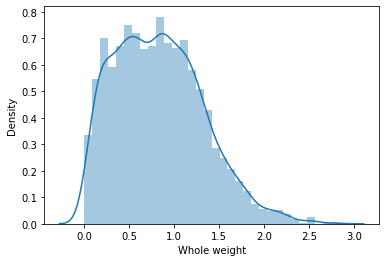

In [9]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

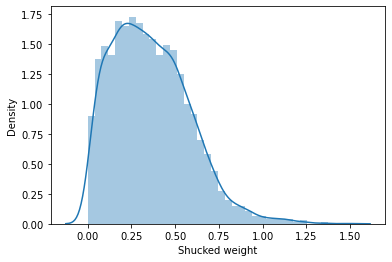

In [10]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

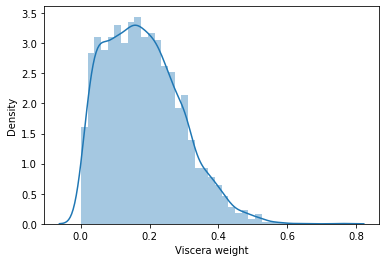

In [11]:
sns.distplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

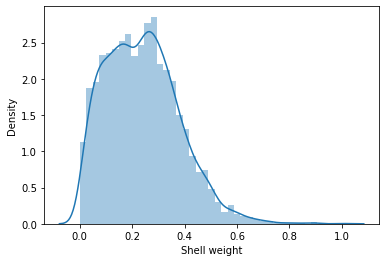

In [12]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Length'>

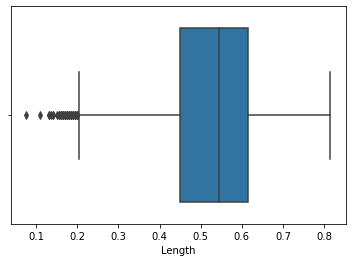

In [13]:
sns.boxplot(df['Length'])

<AxesSubplot:xlabel='Diameter'>

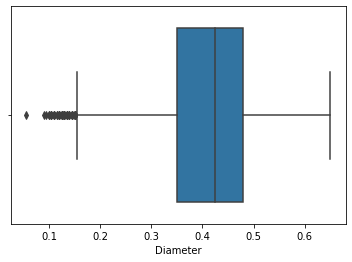

In [14]:
sns.boxplot(df['Diameter'])

<AxesSubplot:xlabel='Height'>

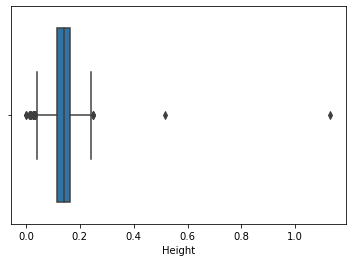

In [15]:
sns.boxplot(df['Height'])

<AxesSubplot:xlabel='Whole weight'>

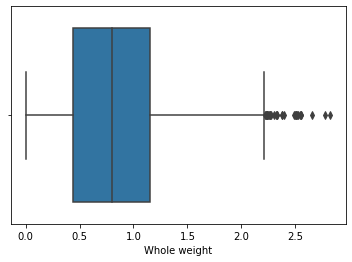

In [16]:
sns.boxplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight'>

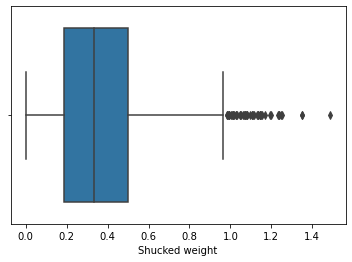

In [17]:
sns.boxplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight'>

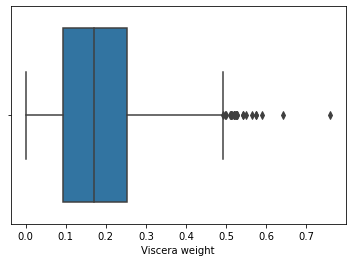

In [18]:
sns.boxplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight'>

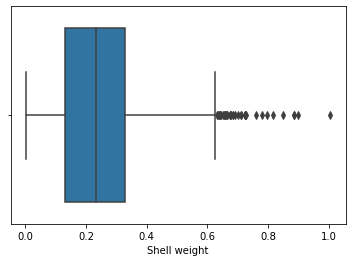

In [19]:
sns.boxplot(df['Shell weight'])

<AxesSubplot:xlabel='Length', ylabel='Rings'>

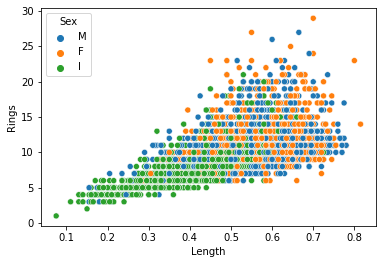

In [20]:
sns.scatterplot(x='Length',y='Rings',hue='Sex',data=df)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

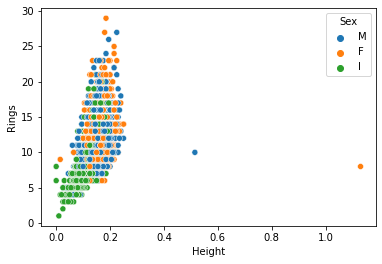

In [21]:
sns.scatterplot(x='Height',y='Rings',hue='Sex',data=df)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

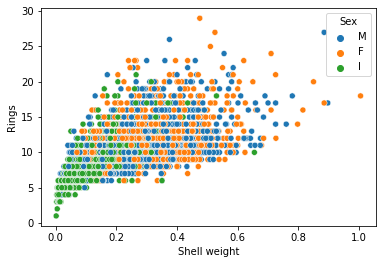

In [22]:
sns.scatterplot(x='Shell weight',y='Rings',hue='Sex',data=df)

In [23]:
## Outliers are present in all the columns

In [24]:
cor=df.corr()
cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

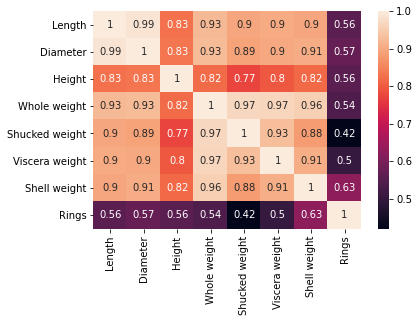

In [25]:
sns.heatmap(cor,annot=True)

In [26]:
df.drop(['Sex'],axis=1,inplace=True)

## Removing Outliers

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
n_df=df[(z<3).all(axis=1)]
n_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [28]:
n_df.shape

(4027, 8)

In [29]:
df.shape

(4177, 8)

In [30]:
dataloss=(4177-4027)/4177

In [31]:
dataloss*100

3.5910940866650707

In [32]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [33]:
n_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,9.738763
std,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691
min,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,8.000000
50%,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,9.000000
75%,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,11.000000
max,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,19.000000


## Skewness

In [34]:
n_df.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [35]:
s=['Length','Diameter']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
for i in s:
    n_df[i] = pt.fit_transform(np.array(n_df[i]).reshape(-1,1))[:,0]

In [36]:
n_df.skew()

Length           -0.082985
Diameter         -0.080956
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [37]:
x=n_df.drop('Rings',axis=1)
y=n_df['Rings']

## Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.684451,-0.543379,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659
1,-1.411739,-1.401132,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033
2,-0.046219,0.037163,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629
3,-0.799651,-0.543379,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574
4,-1.530577,-1.474343,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290


In [39]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,32.667187,Length
1,32.556098,Diameter
2,5.919599,Height
3,108.372475,Whole weight
4,28.983736,Shucked weight
5,17.256194,Viscera weight
6,24.295687,Shell weight


In [40]:
x.drop(['Whole weight'],axis=1,inplace=True)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,32.655841,Length
1,32.533235,Diameter
2,5.918720,Height
3,10.215674,Shucked weight
4,11.084013,Viscera weight
5,11.544370,Shell weight


In [42]:
x.drop(['Length'],axis=1,inplace=True)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,14.400890,Diameter
1,5.914556,Height
2,9.680601,Shucked weight
3,10.787655,Viscera weight
4,11.530845,Shell weight


In [44]:
x.drop(['Diameter'],axis=1,inplace=True)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,5.599639,Height
1,8.091015,Shucked weight
2,10.558640,Viscera weight
3,9.276369,Shell weight


In [46]:
x.drop(['Viscera weight'],axis=1,inplace=True)

In [47]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,5.444258,Height
1,5.270561,Shucked weight
2,8.004515,Shell weight


In [49]:
## VIF below 10 are accepted.

## Choosing Random State Value

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxr2=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxran=i
print('max r2=',maxr2,'ran state=',maxran)

max r2= 0.556496593727193 ran state= 172


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxran)

## Model Selection with Hyper Parameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [54]:
## Lasso

In [55]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'selection':['cyclic', 'random']}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'fit_intercept': True, 'random_state': 4, 'selection': 'random'}


In [56]:
ls = Lasso(alpha=0.001,fit_intercept=True,random_state=4,selection='random')
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
r2=r2_score(y_test,pred)
r2*100

51.61123049934449

In [57]:
## Ridge

In [58]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'max_iter':list(range(1,11)),'normalize':[True,False],'copy_X':[True,False]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'max_iter': 1, 'normalize': True}


In [59]:
rd = Ridge(alpha=0.001,copy_X=True,max_iter=1,normalize=True)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
r2=r2_score(y_test,pred)
r2*100

51.59593943703571

In [60]:
## Linear Regression

In [61]:
parameters = {'fit_intercept':[True,False], 'copy_X':[True,False],'normalize':[True,False],'n_jobs':list(range(1,11))}
lr=LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


In [62]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test,pred)
r2*100

51.622806571700444

In [63]:
## Decision Tree Regression

In [64]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],'max_depth':list(range(1,11)),'max_features':['auto', 'sqrt', 'log2']}
dtr=DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}


In [65]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=6,max_features='auto',splitter='best')
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test,pred)
r2*100

48.533621884701574

## Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ls,x,y,cv=3).mean())
print(cross_val_score(rd,x,y,cv=3).mean())
print(cross_val_score(lr,x,y,cv=3).mean())
print(cross_val_score(dtr,x,y,cv=3).mean())

0.471524551546078
0.4715952135482377
0.47150707323940155
0.4556073239397322


## Model Selection

In [67]:
print(51.611-47.152)
print(51.595-47.159)
print(51.622-47.15)
print(48.533-45.560)

4.458999999999996
4.436
4.472000000000001
2.972999999999999


In [68]:
## Decision Tree Regression has the least difference, so choosing Lasso as our model.

In [69]:
ab_ring=DecisionTreeRegressor(criterion='friedman_mse',max_depth=6,max_features='auto',splitter='best')
ab_ring.fit(x_train,y_train)
pred=ab_ring.predict(x_test)
rd_r2=r2_score(y_test,pred)
rd_r2*100

48.533621884701574

## Saving the model

In [70]:
import joblib
joblib.dump(ab_ring,'Final_abring_mod.pkl')

['Final_abring_mod.pkl']